Date: January 18, 2022\
Author: Carmine Schipani

# UT04 Jupyter Example

This is the nonlinear model of the specimen UT04 from Shin 2017 using the OpenSeesPyAssistant library and the openseepy framework. It is analyzed under the same cyclic loading protocol that Shin used in the real test.

Note that the minimal python version is 3.8 and the packages required are listed in the PyPI webpage of the OpenSeesPyAssistant library.

Import the libraries used:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from openseespy.opensees import *
from OpenSeesPyAssistant.Section import *
from OpenSeesPyAssistant.Units import *
from OpenSeesPyAssistant.Constants import *
from OpenSeesPyAssistant.Fibers import *
from OpenSeesPyAssistant.Connections import *
from OpenSeesPyAssistant.FunctionalFeatures import *
from OpenSeesPyAssistant.MemberModel import *
from OpenSeesPyAssistant.AnalysisAndPostProcessing import *
from OpenSeesPyAssistant.GeometryTemplate import *

Initialise the 2D openseespy model, the geometric tranformation used for the column and beam members.

In [2]:
# Set up
data_dir = "UT04_LP_j"
Initialize2DModel(data_dir)

# Define geometric transformation
geo_transf_ID = 1
geomTransf('PDelta', geo_transf_ID)

Input the variable for the overall model geometry and the sections' dimensions and main material parameters.

In [3]:
### Member parameters and sections
HalfBayWidth = 178.188*inch_unit
HalfHStory1 = 109*inch_unit
HalfHStory2 = 92.625*inch_unit
AxisY3 = HalfHStory1+HalfHStory2

# NB: the depth must remain continuous between same type of elements (columns and beams)
d_Col = 18.25*inch_unit
d_Beam = 35.875*inch_unit
r_Col = (4.125-2.85)*inch_unit
r_Beam = (1.875-0.94)*inch_unit
E = 200.0*GPa_unit

# Panel Zone
Fy_pz = 337.8*MPa_unit;     # Fy wed of the column
pzwidth = d_Col/2           # Half of the PZ width
pzheight = d_Beam/2         # Half of the PZ height

# Bottom Column Section Properties (W14x398)
col_bottom_section = SteelIShape("Col", d_Col, 16.5*inch_unit, 2.86*inch_unit, 1.784*inch_unit, HalfHStory1-pzheight, r_Beam, E, 351.6*MPa_unit, Fy_pz, "Bottom Column")
col_bottom_section.ShowInfo()

# Bottom Column Section Properties (W14x398)
col_top_section = SteelIShape("Col", d_Col, 16.5*inch_unit, 2.86*inch_unit, 1.784*inch_unit, HalfHStory2-pzheight, r_Beam, E, 351.6*MPa_unit, Fy_pz, "Top Column")
col_top_section.ShowInfo()

# East Beam Section Properties (W36x150) (right)
beam_east_section = SteelIShape("Beam", d_Beam, 11.875*inch_unit, 0.892*inch_unit, 0.650*inch_unit, HalfBayWidth-pzwidth, r_Beam, E, 358.5*MPa_unit, name_tag="East Beam")
beam_east_section.ShowInfo()

# West Beam Section Properties (W36x150) (left)
beam_west_section = SteelIShape("Beam", d_Beam, 11.875*inch_unit, 0.890*inch_unit, 0.643*inch_unit, HalfBayWidth-pzwidth, r_Beam, E, 365.4*MPa_unit, name_tag="West Beam")
beam_west_section.ShowInfo()



Requested info for steel I shape section of type = Col and name tag = Bottom Column
d = 463.54999999999995 mm
Fy = 351.6 MPa
Fy web = 337.8 MPa
E = 200.0 GPa
h_1 = 270.764 mm
A = 75795.9482400584 mm2
Iy = 2486084500.6858053 mm4
Iz = 894100214.7164074 mm4
Wply = 13123109.24134195 mm3
Wplz = 6556681.806710891 mm3
Iy_mod = 2734692950.7543855 mm4
iy = 181.10687952166577 mm
iz = 108.61007267995285 mm
My = 4614.08520925583 kNm
Npl = 26649.85540120453 kN


Requested info for steel I shape section of type = Col and name tag = Top Column
d = 463.54999999999995 mm
Fy = 351.6 MPa
Fy web = 337.8 MPa
E = 200.0 GPa
h_1 = 270.764 mm
A = 75795.9482400584 mm2
Iy = 2486084500.6858053 mm4
Iz = 894100214.7164074 mm4
Wply = 13123109.24134195 mm3
Wplz = 6556681.806710891 mm3
Iy_mod = 2734692950.7543855 mm4
iy = 181.10687952166577 mm
iz = 108.61007267995285 mm
My = 4614.08520925583 kNm
Npl = 26649.85540120453 kN


Requested info for steel I shape section of type = Beam and name tag = East Beam
d = 911.22499

Define the actions on the model: forces (vertical and/or horizontal), imposed displacements, loading protocol. Note that no forces are imposed on the UT04 model.

<IPython.core.display.Javascript object>


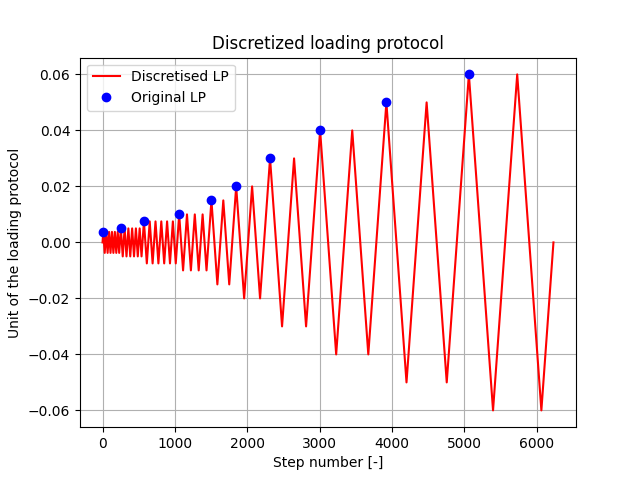

In [4]:
# Forces

# Loading protocol
SDR_LP = np.array([0.00375, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06])
nr_cycles_LP = np.array([6, 6, 6, 4, 2, 2, 2, 2, 2, 2])
discr = DiscretizeLoadProtocol(SDR_LP, nr_cycles_LP, 21, True, True)
discr_LP = discr * AxisY3

Model the structure by defining the members (panel zone, columns and beams), the material model and the fiber sections. Note that in this example, no fiber sections are used.

<IPython.core.display.Javascript object>


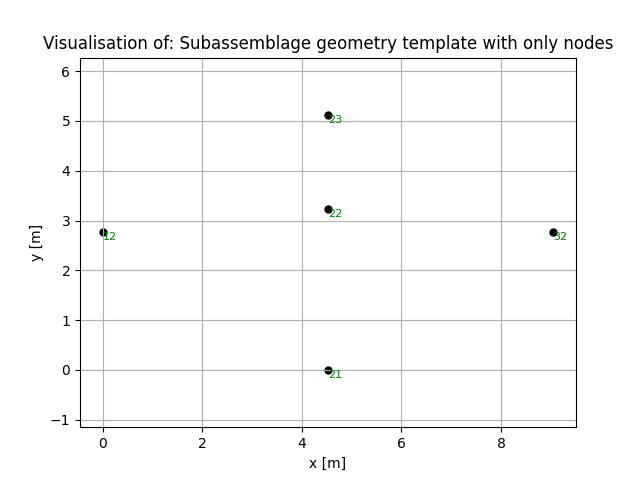

In [5]:
# Geometry (grid nodes)
DefineSubassemblageNodes(beam_west_section.L, beam_east_section.L, col_top_section.L, col_bottom_section.L, d_Col, d_Beam, show_plot=True)
ctrl_node = 23


Requested info for Panel Zone member model, master node ID = 22
Section associated, column: Top Column 
Section associated, beam: West Beam 
Material model of the panel zone ID = 22
Spring ID = 2212201 (if -1, not defined yet)
Mid panel zone width = 231.77499999999998 mm
Mid panel zone height = 455.61249999999995 mm
Young modulus E = 200.0 GPa
Area of the elements (rigid) = 7579594.824005839 mm2
Moment of inetia of the elements (strong axis, rigid) = 366522084666.3006 mm4
Geometric transformation = 1



<IPython.core.display.Javascript object>


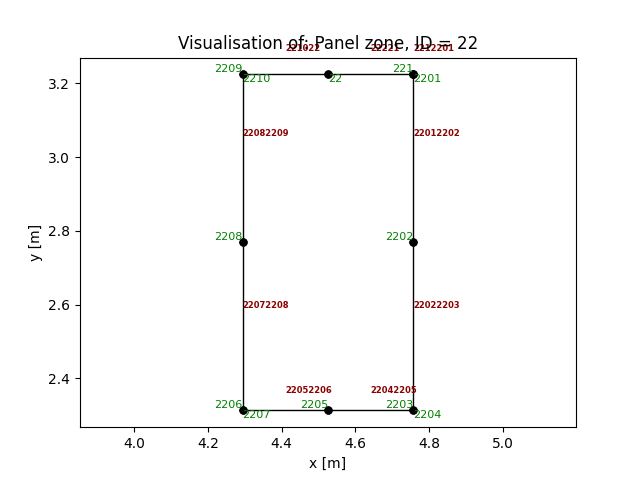

In [6]:
# Panel zone
panel_zone = PanelZoneSteelIShapeSkiadopoulos2021(22, col_top_section, beam_west_section, geo_transf_ID)
panel_zone.CreateMember()
panel_zone.ShowInfo(True, True)

The d/tw check was not fullfilled
The validity of the equations is not fullfilled.
!!!!!!! WARNING !!!!!!! Check material model of Modified IMK, ID= 220832208


Requested info for Modified IMK (Ibarra-Medina-Krawinkler) material model Parameters, ID = 220832208
Section associated: West Beam
theta y = 0.007321448648535882
theta p = 0.016696672141310893
theta r = 0.08914488104630115
theta pc = 0.10181789279530191
theta u = 0.2
My star = 3749.4376085753634 kNm
Mc = 4161.875745518653 kNm
Mr = 1499.7750434301454 kNm
a = 0.048234722735336466 
as = 0.004586072936423704 
lambda (deterioration rate) = 0.8133372196806582 



Modified Ibarra-Medina-Krawinkler Model with Bilinear Hysteretic Response


<IPython.core.display.Javascript object>


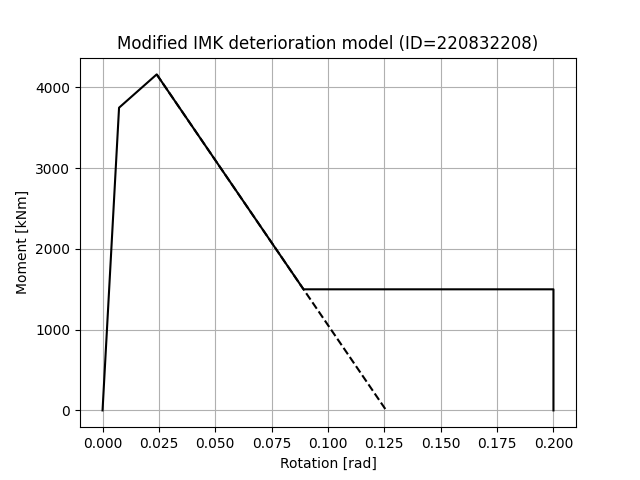


Requested info for SpringBasedElement member model, ID = 1222083
Section associated West Beam 
Material model of the spring i, ID = -1
Material model of the spring j, ID = 220832208
Area A = 28265.1174954584 mm2
Young modulus E = 200.0 GPa
n modified moment of inertia Iy_mod = 4031742931.3293066 mm4
Geometric transformation = 1



<IPython.core.display.Javascript object>


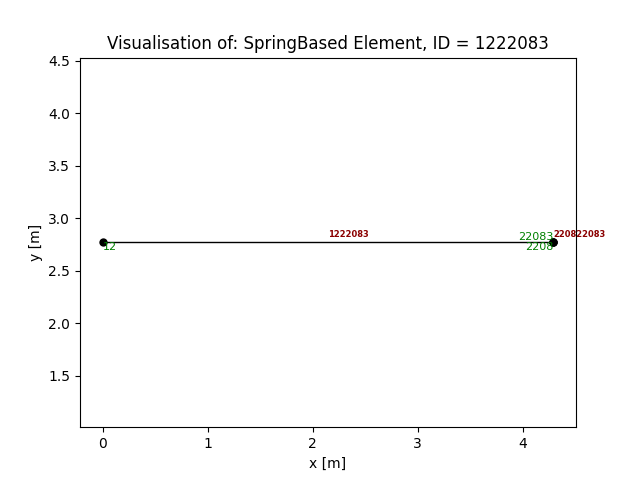

In [7]:
# Beam left
beam_west_spring = ModifiedIMKSteelIShape(220832208, beam_west_section)
beam_west_spring.Bilin()
beam_west_spring.ShowInfo(True, True)
beam_west = SpringBasedElementSteelIShape(12, 2208, beam_west_section, geo_transf_ID, mat_ID_j=beam_west_spring.ID)
beam_west.CreateMember()
beam_west.ShowInfo(True, True)

The d/tw check was not fullfilled
The validity of the equations is not fullfilled.
!!!!!!! WARNING !!!!!!! Check material model of Modified IMK, ID= 220222022


Requested info for Modified IMK (Ibarra-Medina-Krawinkler) material model Parameters, ID = 220222022
Section associated: East Beam
theta y = 0.007189018614918919
theta p = 0.016851478930585893
theta r = 0.0900952859287076
theta pc = 0.10326875366951423
theta u = 0.2
My star = 3696.7181071015675 kNm
Mc = 4103.3570988827405 kNm
Mr = 1478.6872428406273 kNm
a = 0.046927159977975155 
as = 0.004456212162588268 
lambda (deterioration rate) = 0.8299822268543833 



<IPython.core.display.Javascript object>


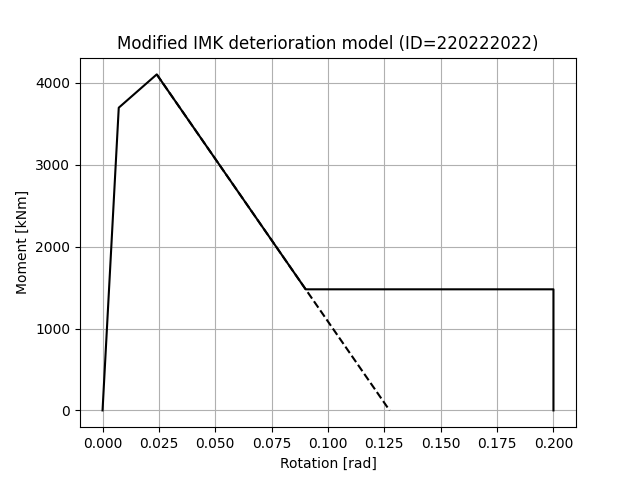


Requested info for SpringBasedElement member model, ID = 2202232
Section associated East Beam 
Material model of the spring i, ID = 220222022
Material model of the spring j, ID = -1
Area A = 28448.062290858397 mm2
Young modulus E = 200.0 GPa
n modified moment of inertia Iy_mod = 4048279126.283783 mm4
Geometric transformation = 1



<IPython.core.display.Javascript object>


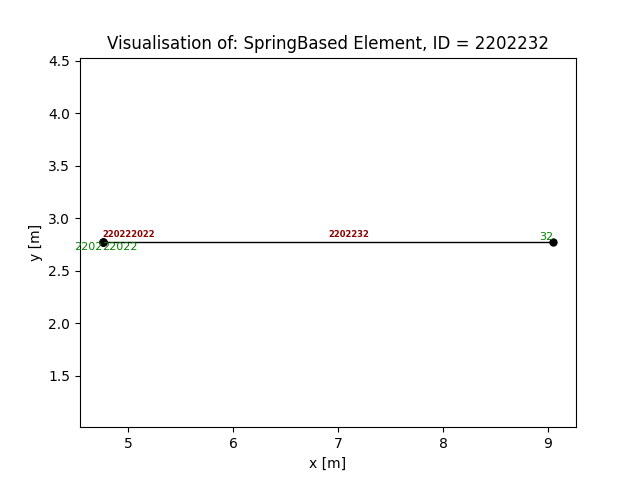

In [8]:
# Beam right
beam_east_spring = ModifiedIMKSteelIShape(220222022, beam_east_section)
beam_east_spring.Bilin()
beam_east_spring.ShowInfo(True, True)
beam_east = SpringBasedElementSteelIShape(2202, 32, beam_east_section, geo_transf_ID, mat_ID_i=beam_east_spring.ID)
beam_east.CreateMember()
beam_east.ShowInfo(True, True)

The Lb/iz check was not fullfilled
The validity of the equations is not fullfilled.
!!!!!!! WARNING !!!!!!! Check material model of Modified IMK, ID= 22622


Requested info for Modified IMK (Ibarra-Medina-Krawinkler) material model Parameters, ID = 22622
Section associated: Top Column
theta y = 0.006748355511682214
theta p = 0.2
theta r = 0.15
theta pc = 0.3
theta u = 0.15
My star = 5306.197990644204 kNm
Mc = 6898.057387837465 kNm
Mr = 6898.057387837465 kNm
a = 0.01012253326752332 
as = 0.0009287771861061897 
lambda (deterioration rate) = 3.0 



<IPython.core.display.Javascript object>


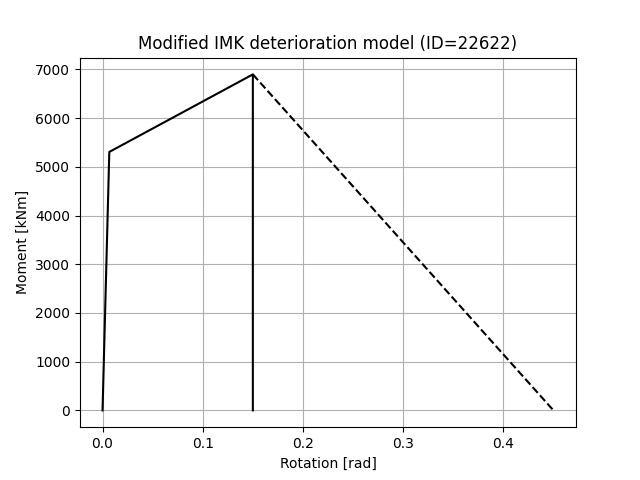


Requested info for SpringBasedElement member model, ID = 22623
Section associated Top Column 
Material model of the spring i, ID = 22622
Material model of the spring j, ID = -1
Area A = 75795.9482400584 mm2
Young modulus E = 200.0 GPa
n modified moment of inertia Iy_mod = 2734692950.7543855 mm4
Geometric transformation = 1



<IPython.core.display.Javascript object>


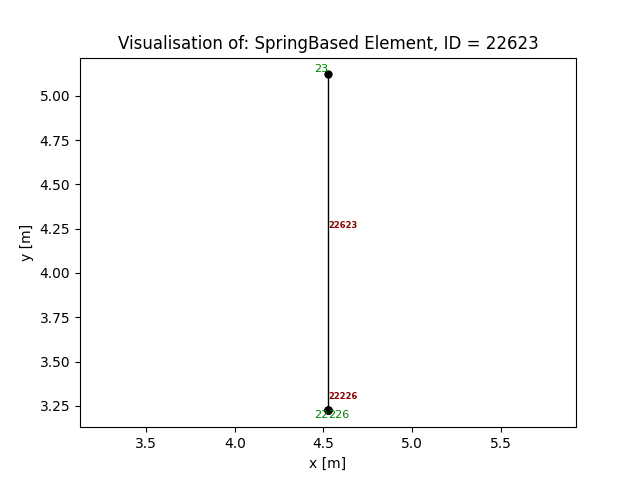

In [9]:
# Column top
col_top_spring = ModifiedIMKSteelIShape(22622, col_top_section)
col_top_spring.Bilin()
col_top_spring.ShowInfo(True, True)
col_top = SpringBasedElementSteelIShape(22, 23, col_top_section, geo_transf_ID, mat_ID_i=col_top_spring.ID)
col_top.CreateMember()
col_top.ShowInfo(True, True)

The Lb/iz check was not fullfilled
The validity of the equations is not fullfilled.
!!!!!!! WARNING !!!!!!! Check material model of Modified IMK, ID= 220522057


Requested info for Modified IMK (Ibarra-Medina-Krawinkler) material model Parameters, ID = 220522057
Section associated: Bottom Column
theta y = 0.0082279112807707
theta p = 0.2
theta r = 0.15
theta pc = 0.3
theta u = 0.15
My star = 5306.197990644204 kNm
Mc = 6898.057387837465 kNm
Mr = 6898.057387837465 kNm
a = 0.012341866921156049 
as = 0.0011347193153624301 
lambda (deterioration rate) = 3.0 



<IPython.core.display.Javascript object>


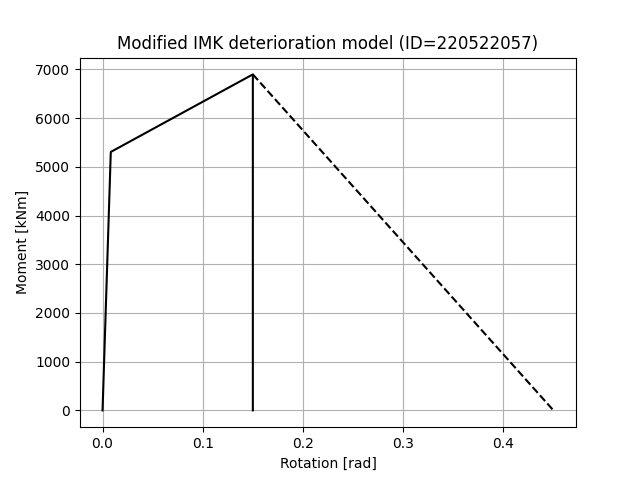


Requested info for SpringBasedElement member model, ID = 2122057
Section associated Bottom Column 
Material model of the spring i, ID = -1
Material model of the spring j, ID = 220522057
Area A = 75795.9482400584 mm2
Young modulus E = 200.0 GPa
n modified moment of inertia Iy_mod = 2734692950.7543855 mm4
Geometric transformation = 1



<IPython.core.display.Javascript object>


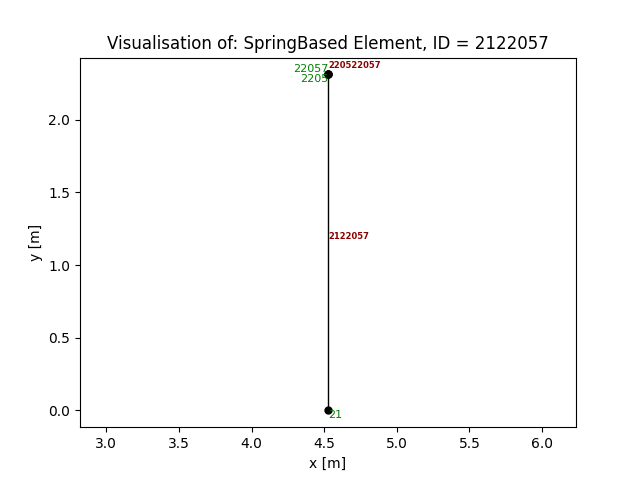

In [10]:
# Column bottom
col_bottom_spring = ModifiedIMKSteelIShape(220522057, col_bottom_section)
col_bottom_spring.Bilin()
col_bottom_spring.ShowInfo(True, True)
col_bottom = SpringBasedElementSteelIShape(21, 2205, col_bottom_section, geo_transf_ID, mat_ID_j=col_bottom_spring.ID)
col_bottom.CreateMember()
col_bottom.ShowInfo(True, True)


Model Built
No Model_ODB specified, trying to get data from the active model.
2D model


<IPython.core.display.Javascript object>


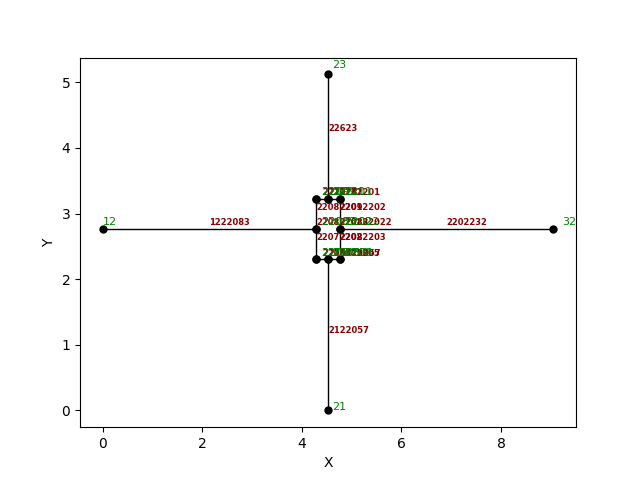

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='X', ylabel='Y'>)

In [11]:
# Model complete
print("")
print("Model Built")

# Display structure with node and element IDs
opsplt.plot_model("nodes", "elements")

Record the forces, moments, displacements and rotations needed.

In [12]:
# Roof lateral displacement
recorder("Node", "-file", '{}/LatDispl.txt'.format(data_dir), "-time", "-node", ctrl_node, "-dof", 1, "disp")

# Force
col_top.Record("element", "TipColumnForce", data_dir, True, False, True)

# Deformation
panel_zone.Record("PZDef", data_dir, False, True, False)
col_top.Record("spring_i", "ColSpringT", data_dir, False, True, False)
col_bottom.Record("spring_j", "ColSpringB", data_dir, False, True, False)
beam_west.Record("spring_j", "BeamSpringW", data_dir, False, True, False)
beam_east.Record("spring_i", "BeamSpringE", data_dir, False, True, False)

Finally, analyze the model defined under the actions imposed, check the animation of the deformed shape and save the information from the sections, members, materials and fibers defined before.


Loading Protocol analysis starts
The progression is 0%
The progression is 10%
The progression is 20%
The progression is 30%
The progression is 40%
The progression is 50%
The progression is 60%
The progression is 70%
The progression is 80%
The progression is 90%
The progression is 100%


<IPython.core.display.Javascript object>


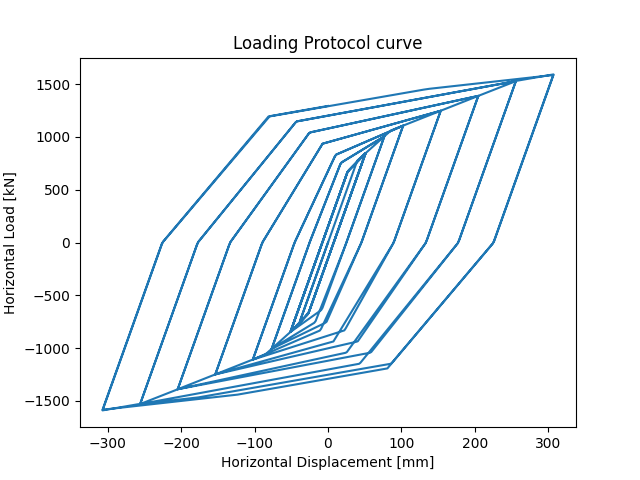


Loading Protocol complete


In [13]:
# Initialize analysis
analysis_opt = Analysis(data_dir, data_dir)

# Gravity analysis (not present)
# analysis_opt.Gravity([ctrl_node], [-N_G], 1, 1, show_plot=True, block=True)

# Lateral force analysis (not present)
# analysis_opt.LateralForce([ctrl_node], [1*kN_unit], 2, 2, show_plot=True, block=True)

# Pushover analysis (not present)
# analysis_opt.Pushover(ctrl_node, (HalfHStory1+HalfHStory2)*0.02, 0.04*mm_unit, 2, 2, show_plot=True, block=True)
    
# Loading protocol analysis
analysis_opt.LoadingProtocol(ctrl_node, discr_LP, 2, 2, show_plot=True, block=True)

Reading displacement data from UT04_LP_j_ODB/LoadingProtocol
2D model


<IPython.core.display.Javascript object>


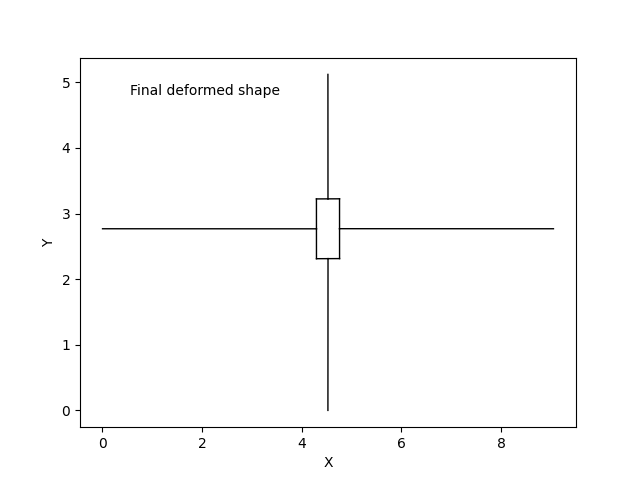

<IPython.core.display.Javascript object>


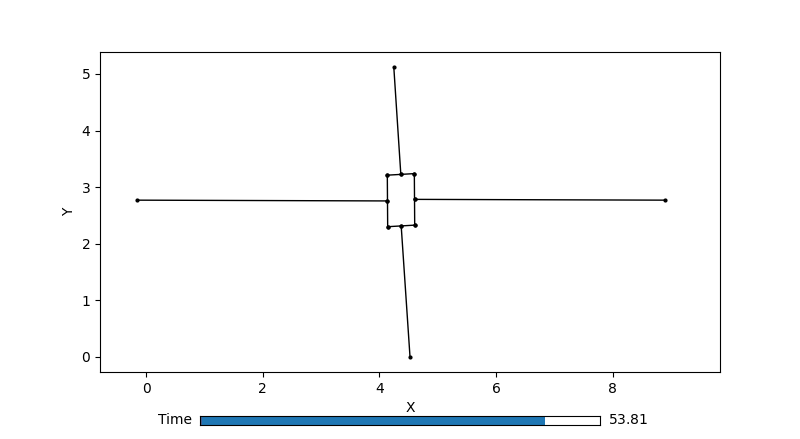

Saving infos for postprocessing analysis


/home/carmine/.local/lib/python3.8/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [14]:
# Postprocessing
analysis_opt.DeformedShape(animate = True)

# Save info of sections, elements, material models,...
print("Saving infos for postprocessing analysis")
with open("{}/SavedInfos.txt".format(data_dir), 'w') as f:
    col_bottom_section.SaveData(f)
    col_top_section.SaveData(f)
    beam_east_section.SaveData(f)
    beam_west_section.SaveData(f)
    col_bottom_spring.SaveData(f)
    col_top_spring.SaveData(f)
    beam_east_spring.SaveData(f)
    beam_west_spring.SaveData(f)
    panel_zone.SaveData(f)